# Fashion MNIST Data Analysis

In [2]:
%%capture

import numpy as np
import matplotlib.pyplot as plt

import import_ipynb
import DataUtils as DU

import cache_magic # pip install ipython-cache

In [3]:
Ximg, Xlab = DU.load_data("data/fashion_mnist_70000.hdf5")

## Raw Data

Fasion MNIST is a "drop-in replacement" for the MNIST dataset.  Like MNIST, it consists of 70,000 images, each normalized to fit within a 28x28 array.  The images are categorized into 10 classes, however, instead of corresponding to handwritten digits, the images are of different articles of clothing.  Some of the image classes are *harder* to separate than MNIST digits.

Each article of clothing is a different example from its category, and there is considerable variation in the images, even within a single category.

Here is a sample of the images found in Fashion MNIST:

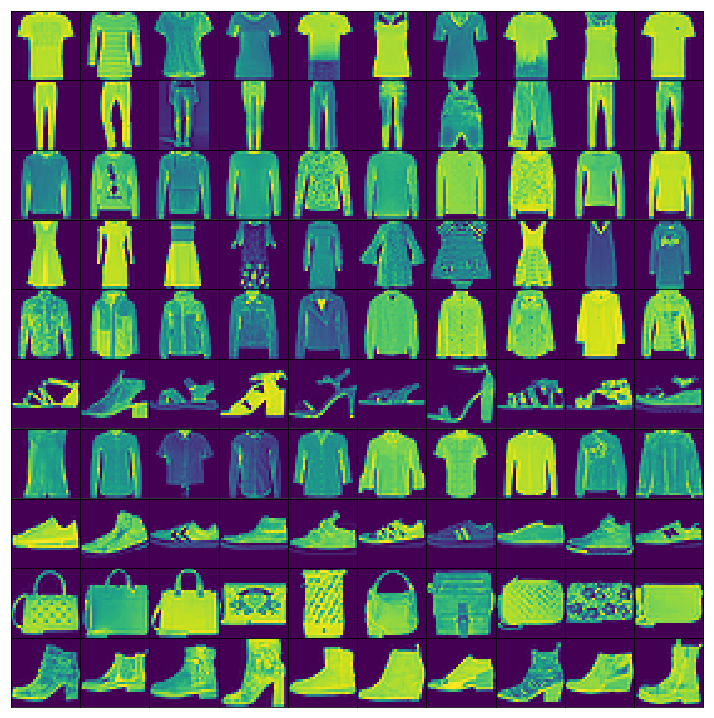

In [4]:
grouped = np.hstack([np.arange(70000)[Xlab==i][:10] for i in range(10)])
DU.show_data(Ximg[grouped], cols=10)

## Principal Components

We perform singular value decomposition of the covariance matrix to determine the principal components of the data.

### Explanation of variance

The following graph shows the relative magnitude of each principal component, and how much total variance is explained by the first $k$ principal components.


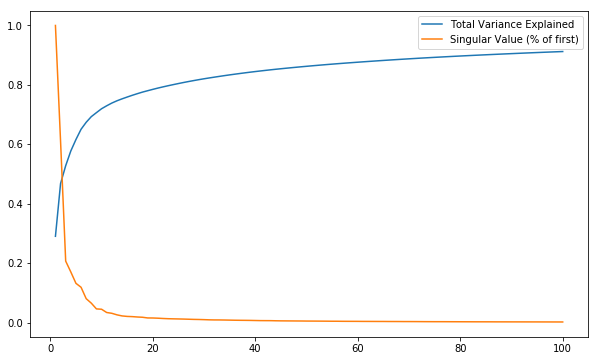

In [5]:
X, Xbar, CX = DU.normalize_image_data(Ximg)
Xu, Xs, Xvt = np.linalg.svd(CX)
DU.graph_variance_explained(Xs)

Here, we see that the first 20 principal components explain more than 75% of the variance in the data.

### Visualizing the Average Image

We have preprocessed our data to be zero mean across each pixel.

This is what the average image from this dataset looks like:

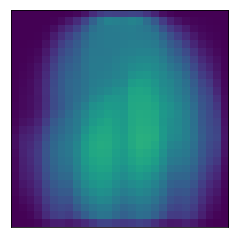

In [6]:
DU.show_img(DU.X_to_img(0, Xbar))

The average number looks vaguely like a faint, blurry blob centered in the $28 \times 28$ space.

When we examine principle components, it is important to remember that each PC represents a direction which is "added" to this base image.  (In other words, this image represents the origin in PCA space.)


### Visualizing Principal Components

We can interpret the meaning of each principal component by projecting it as an image.

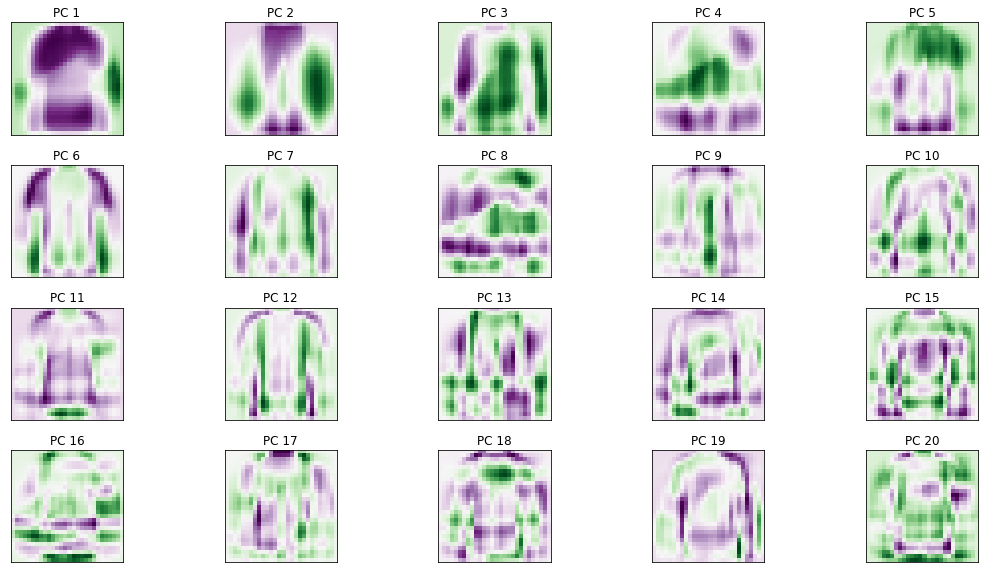

In [7]:
DU.show_pcs(Xu, 20)

The graph above shows the first 20 principal components.

* The first principal component (PC 1) differentiates images which extend into the top/bottom versus those that extend more towards the left/right edges of the space.  This may be used to differentiate between a shirt-like article and a shoe-like article.
* PC 2 appears to distinguish between pant-like and shirt-like articles.
* PC 3 appears to focus on long sleeves.
* As further principal components are visualized, the apparent complexity of their respective images increases.

### Determining the Subspace

We can attempt to visually estimate the dimension of the linear subspace for Fashion MNIST data by looking at dimensionally reduced images projected back into pixel space.

Here, we examine the quality of 20 random images as they are projected into truncated PCA coordianates.

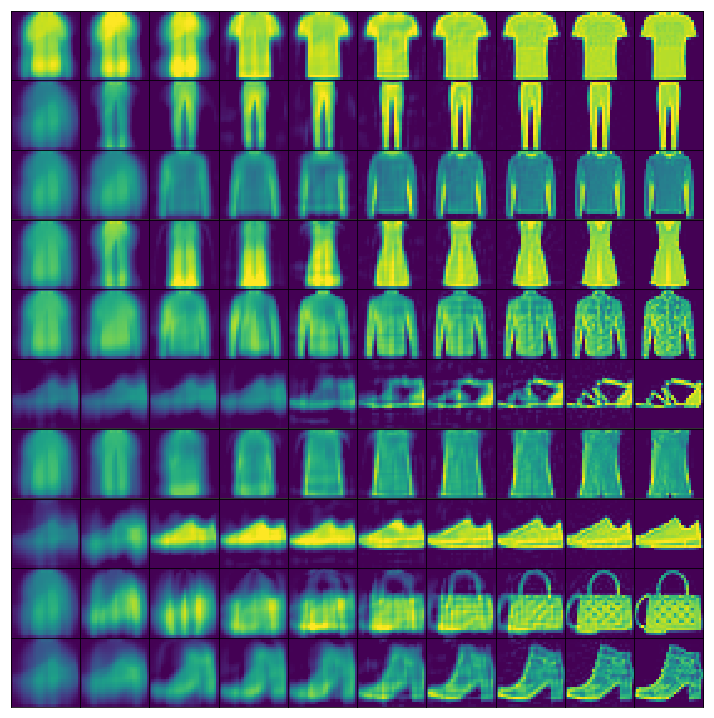

In [8]:
dims = [1, 2, 5, 10, 20, 50, 100, 200, 400, 784]

samp = X[:20]
Psamp = [(X[grouped][0:100:10,:] @ Xu[:,:k]) @ Xu.T[:k,:] for k in dims]

pcadigits = np.asarray(Psamp).transpose((1,0,2))

DU.show_data(DU.X_to_img(np.vstack(pcadigits), Xbar), cols=10)

In the image above, each row represents an original data point, and each column represents a level of PCA dimension reduction.





### Observations

We can characterize the number of components used roughly as follows:

| Dimension | % Variance | Description                                   |
| --------- | ---------- | --------------------------------------------- |
| 1         | 10%        | images appear as pant/shirt-like or shoe-like |
| 2         | 15%        | images appear as shirt, pant, or shoe-like    |
| 5         | 25%        | very rough shapes for most articles emerge    |
| 10        | 40%        | basic forms become recognizable               |
| 20        | 60%        | most articles shapes are easily recognized    |
| 50        | 80%        | all articles are easily recognizable          |
| 100       | 90%        | edges sharpen; background artifacts are reduced |
| 200       | 95%        | articles appear sharp; small background artifacts remain |
| 400       | 99%        | background artifacts can no longer be seen    |
| 784       | 100%       | original images are perfectly restored        |


## Embeddings

### PCA

We can look at the relationships between the most significant prinipal components by creating a scatterplot matrix.

Here, we show a scatterplot matrix of PC 1-5, with histograms on the diagonal.

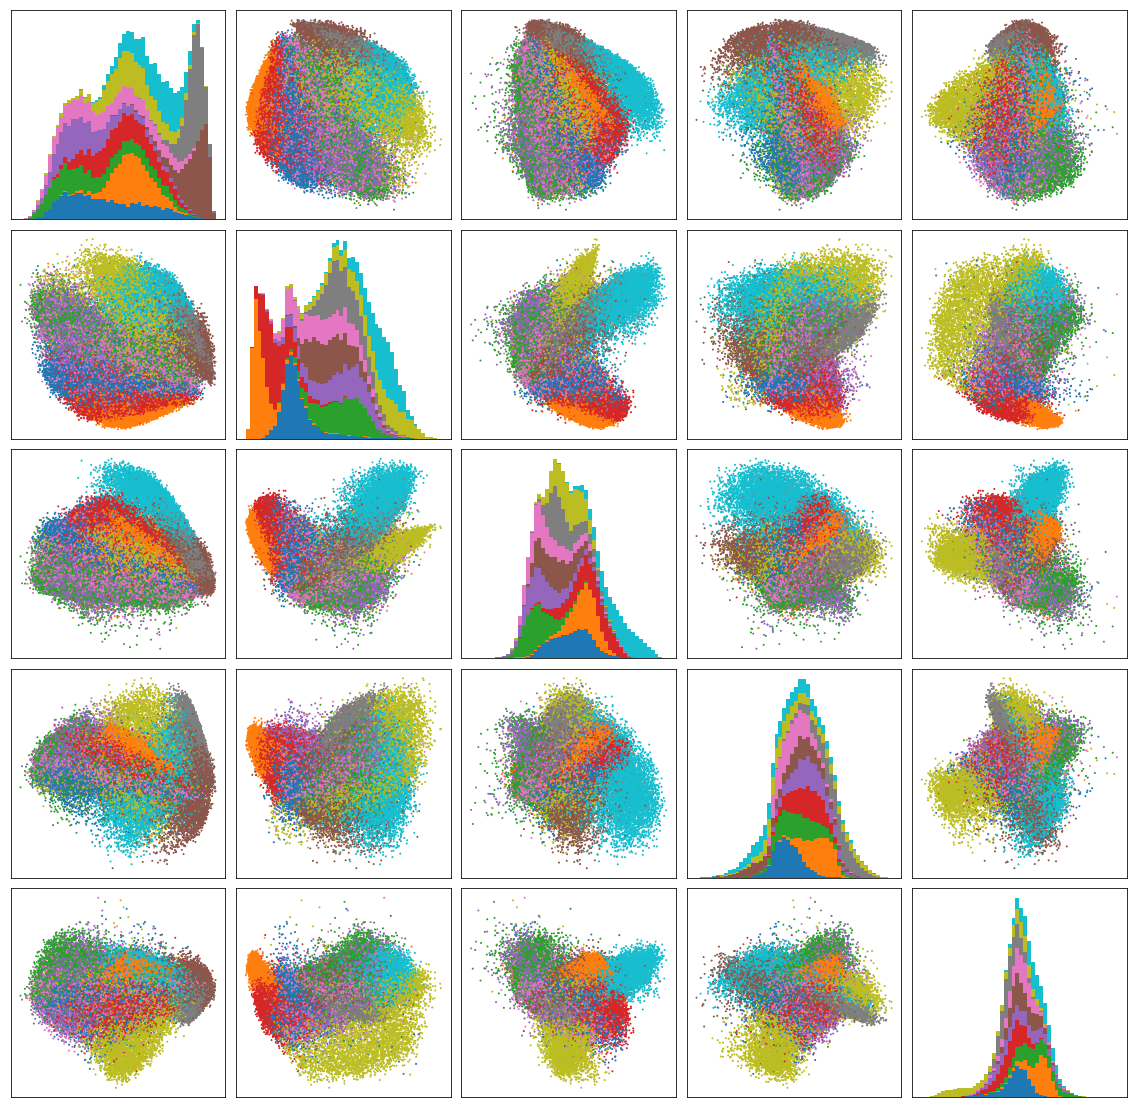

In [9]:
DU.show_splom(X @ Xu[:,:5], labels=Xlab, width=20)

Note:

* PC 1 alone is able to differentiate between the digits 0-1 almost perfectly.
* PCs 2-5 show some correlation with certain digit categories, however none of these PCs seem to provide an obvious means for separating other digits (taken individually or pairwise).

In [10]:
from sklearn import manifold

dims = list(range(1,21))
errors5 = []
for d in dims:
    model = manifold.Isomap(n_components=d, n_neighbors=15)
    model.fit(X[:5000])
    errors5.append(model.reconstruction_error())

KeyboardInterrupt: 

In [ ]:
print(errors5)

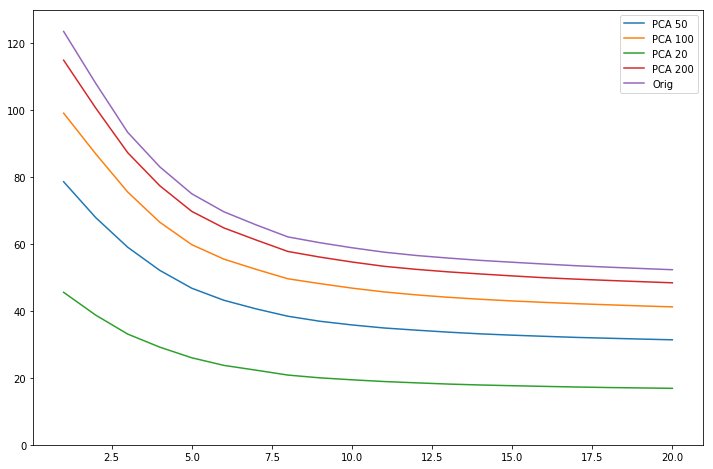

In [51]:
plt.figure(figsize=(12,8))
plt.plot(dims, errors, label="PCA 50")
plt.plot(dims, errors2, label="PCA 100")
plt.plot(dims, errors3, label="PCA 20")
plt.plot(dims, errors4, label="PCA 200")
plt.plot(dims, errors5, label="Orig")
plt.ylim([0.0, 130])
plt.legend()

In [ ]:
dims = list(range(1,21))

derrors = []
for digit in range(10):
    de = []
    for d in dims:
        model = manifold.Isomap(n_components=d, n_neighbors=15)
        model.fit(X[Xlab==digit][:5000])
        de.append(model.reconstruction_error())
    derrors.append(de)

In [72]:
model.

'auto'

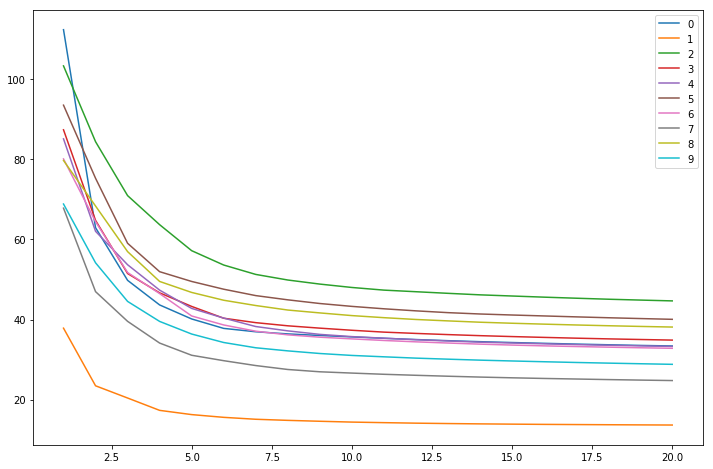

In [58]:
plt.figure(figsize=(12,8))
for digit in range(10):
    plt.plot(dims, derrors[digit], c=plt.get_cmap('tab10')(digit), label=str(digit))
plt.legend()

### Isomap

We compare the Isomap embeddings of the data when projected into the first $k$ principal components.

Due to slow runtimes for Isomap on large datasets, we limit the number of points to `20,000`.

In [13]:
nsamp = 20000
Xsamp = X[:nsamp]

In [14]:
%cache isomap_fashion_pca5 = DU.isomap_embedding(Xsamp @ Xu[:,:5])
%cache isomap_fashion_pca10 = DU.isomap_embedding(Xsamp @ Xu[:,:10])
%cache isomap_fashion_pca20 = DU.isomap_embedding(Xsamp @ Xu[:,:20])
%cache isomap_fashion_pca50 = DU.isomap_embedding(Xsamp @ Xu[:,:50])
%cache isomap_fashion_pca100 = DU.isomap_embedding(Xsamp @ Xu[:,:100])
%cache isomap_fashion_all = DU.isomap_embedding(Xsamp)

creating new value for variable 'isomap_fashion_pca5'
creating new value for variable 'isomap_fashion_pca10'
creating new value for variable 'isomap_fashion_pca20'
creating new value for variable 'isomap_fashion_pca50'
creating new value for variable 'isomap_fashion_pca100'
creating new value for variable 'isomap_fashion_all'


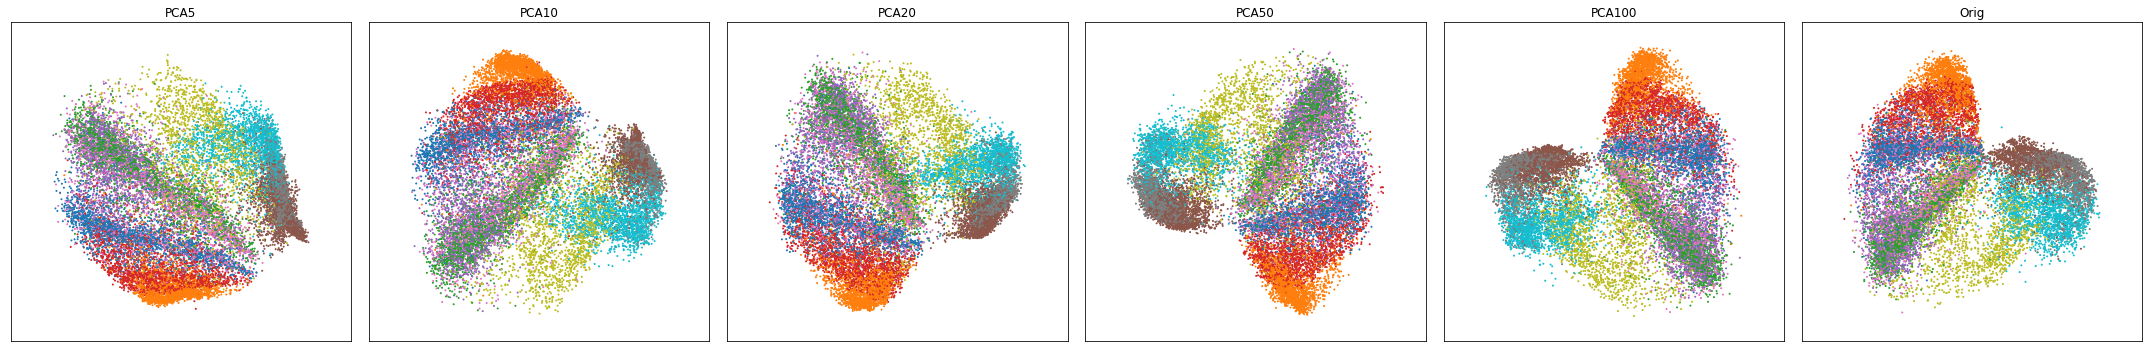

In [15]:
DU.show_embeddings(
    [isomap_fashion_pca5, isomap_fashion_pca10, isomap_fashion_pca20, isomap_fashion_pca50, isomap_fashion_pca100, isomap_fashion_all],
    titles=["PCA5", "PCA10", "PCA20", "PCA50", "PCA100", "Orig"],
    labels=Xlab[:nsamp]
)

There is little variation across the images provided.  This, combined with the large clouds of overlapping points, suggests that Isomap is not capable representing the manifold in a way which clusters the MNIST digits.

### Student-T Stochastic Neighbor (t-SNE)



In [16]:
%cache tsne_fashion_pca5 = DU.tsne_embedding(X @ Xu[:,:5])
%cache tsne_fashion_pca10 = DU.tsne_embedding(X @ Xu[:,:10])
%cache tsne_fashion_pca20 = DU.tsne_embedding(X @ Xu[:,:20])
%cache tsne_fashion_pca50 = DU.tsne_embedding(X @ Xu[:,:50])
%cache tsne_fashion_pca100 = DU.tsne_embedding(X @ Xu[:,:100])
%cache tsne_fashion_all = DU.tsne_embedding(X)

creating new value for variable 'tsne_fashion_pca5'
creating new value for variable 'tsne_fashion_pca10'
creating new value for variable 'tsne_fashion_pca20'
creating new value for variable 'tsne_fashion_pca50'
creating new value for variable 'tsne_fashion_pca100'
creating new value for variable 'tsne_fashion_all'


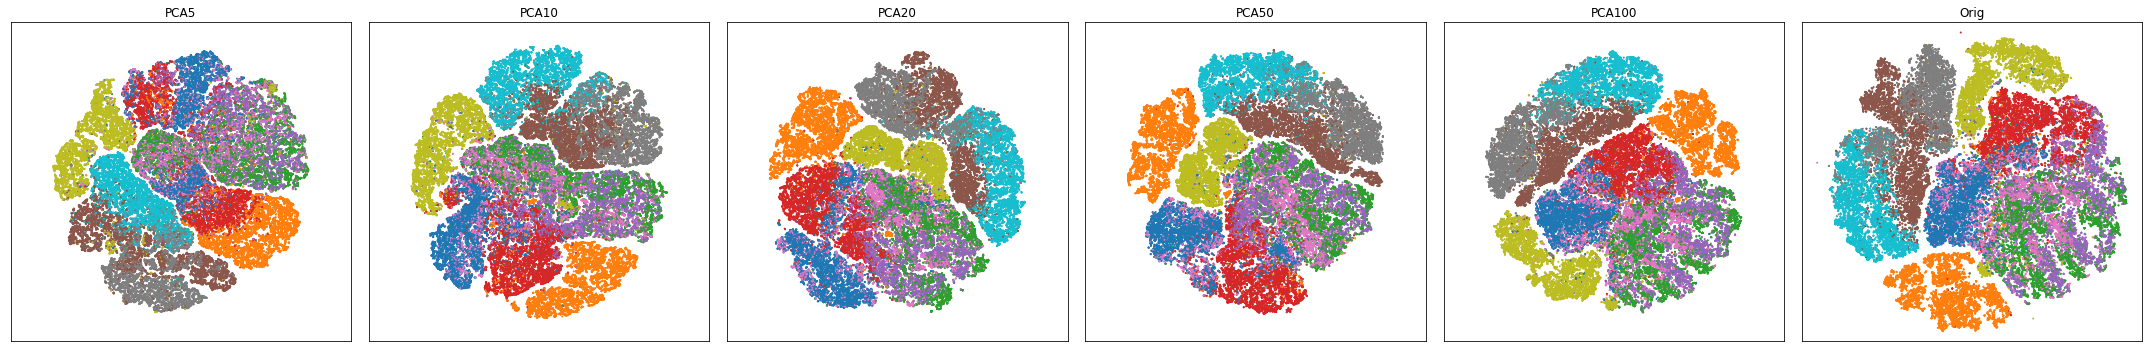

In [17]:
DU.show_embeddings(
    [tsne_fashion_pca5, tsne_fashion_pca10, tsne_fashion_pca20, tsne_fashion_pca50, tsne_fashion_pca100, tsne_fashion_all],
    titles=["PCA5", "PCA10", "PCA20", "PCA50", "PCA100", "Orig"],
    labels=Xlab
)

The t-SNE embeddings show clear improvement through 5, 10, and 20 PCA dimensions.  At 50 dimensions we see distinct clusters for all 10 digits, with fairly good separation between clusters.  Additional dimensions offer no discernable improvement.

### Uniform Manifold Approximation and Projection (UMAP)

Here, we look at same PCA projections of the data using UMAP.

In [11]:
%cache umap_fashion_pca5 = DU.umap_embedding(X @ Xu[:,:5])
%cache umap_fashion_pca10 = DU.umap_embedding(X @ Xu[:,:10])
%cache umap_fashion_pca20 = DU.umap_embedding(X @ Xu[:,:20])
%cache umap_fashion_pca50 = DU.umap_embedding(X @ Xu[:,:50])
%cache umap_fashion_pca100 = DU.umap_embedding(X @ Xu[:,:100])
%cache umap_fashion_all = DU.umap_embedding(X)

creating new value for variable 'umap_fashion_pca5'
creating new value for variable 'umap_fashion_pca10'
creating new value for variable 'umap_fashion_pca20'
creating new value for variable 'umap_fashion_pca50'
creating new value for variable 'umap_fashion_pca100'
creating new value for variable 'umap_fashion_all'


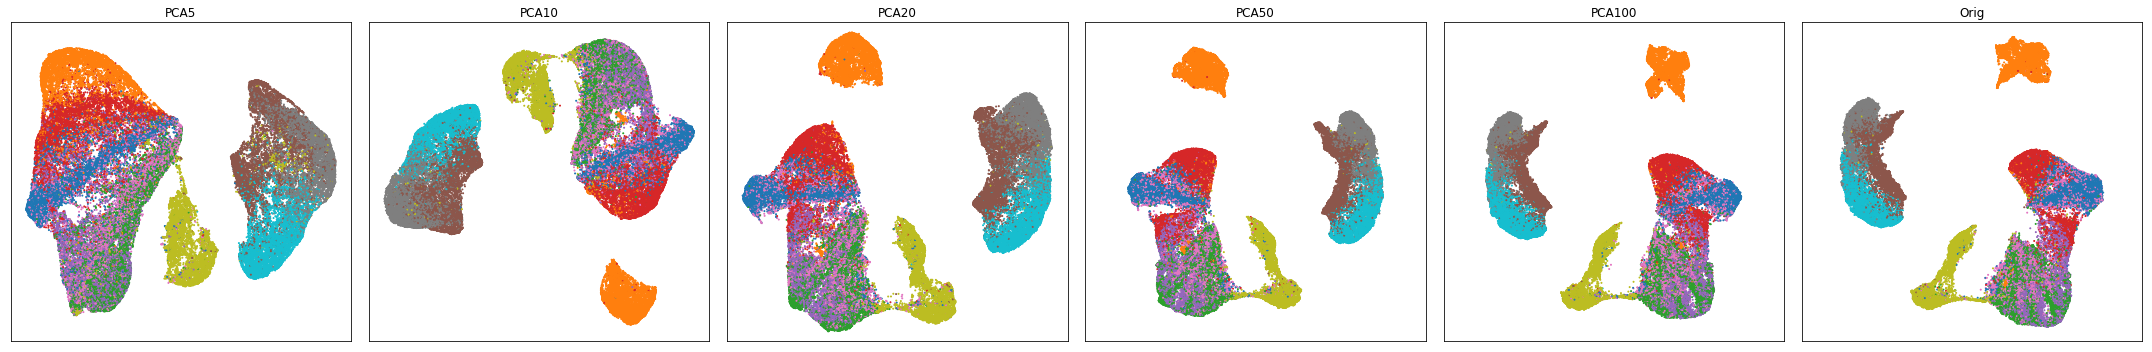

In [12]:
DU.show_embeddings(
    [umap_fashion_pca5, umap_fashion_pca10, umap_fashion_pca20, umap_fashion_pca50, umap_fashion_pca100, umap_fashion_all],
    titles=["PCA5", "PCA10", "PCA20", "PCA50", "PCA100", "Orig"],
    labels=Xlab
)

The UMAP embeddings appear to do the best job of representing the manifold in two dimensions.  Based on the compactness and separation of visible clusters, UMAP validates our earlier understanding of the manifold and subspace.

## Conclusion: Manifold lies in 50-D Subspace

MNIST data lies on a manifold which is able to reveal clusters for each of the separate digits.  When the data is projected into the subspace of the first 50 principal components, this manifold is largely preserved, with no discernable loss in the ability to differentiate digits.

In [18]:
%cache